In [1]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
#import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

### 6.1
Create a table/data frame with the closing prices of 30 different stocks, with 10 from each of the caps

In [2]:
data = pd.DataFrame()
ADANI = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Large_Cap\Large_Cap\ADANIPORTS.CSV')
data['Adani'] = ADANI['Close Price']
ASIANPAINT = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Large_Cap\Large_Cap\ASIANPAINT.csv')
data['ASIANPAINT'] = ASIANPAINT['Close Price']
AXISBANK = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Large_Cap\Large_Cap\AXISBANK.csv')
data['AXISBANK'] = AXISBANK['Close Price']
DRREDDY = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Large_Cap\Large_Cap\DRREDDY.csv')
data['DRREDDY'] = DRREDDY['Close Price']
HDFC = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Large_Cap\Large_Cap\HDFC.csv')
data['HDFC'] = HDFC['Close Price']
HDFCBANK = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Large_Cap\Large_Cap\HDFCBANK.csv')
data['HDFCBANK'] = HDFCBANK['Close Price']
MARUTI = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Large_Cap\Large_Cap\MARUTI.csv')
data['MARUTI'] = MARUTI['Close Price']
TITAN = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Large_Cap\Large_Cap\TITAN.csv')
data['TITAN'] = TITAN['Close Price']
TCS = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Large_Cap\Large_Cap\TCS.CSV')
data['TCS'] =TCS['Close Price']
LT = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Large_Cap\Large_Cap\LT.csv')
data['LT'] = LT['Close Price']

# Mid_cap
VOLTAS = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Mid_Cap\Mid_Cap\VOLTAS.csv')
data['VOLTAS'] = VOLTAS['Close Price']
TATAPOWER = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Mid_Cap\Mid_Cap\TATAPOWER.csv')
data['TATAPOWER'] = TATAPOWER['Close Price']
DHFL = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Mid_Cap\Mid_Cap\DHFL.csv')
data['DHFL'] = DHFL['Close Price']
SUNTV = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Mid_Cap\Mid_Cap\SUNTV.csv')
data['SUNTV'] = SUNTV['Close Price']
PNB = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Mid_Cap\Mid_Cap\PNB.csv')
data['PNB'] = PNB['Close Price']
IDBI = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Mid_Cap\Mid_Cap\IDBI.csv')
data['IDBI'] = IDBI['Close Price']
RBLBANK = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Mid_Cap\Mid_Cap\RBLBANK.csv')
data['RBLBANK'] = RBLBANK['Close Price']
TATACHEM = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Mid_Cap\Mid_Cap\TATACHEM.csv')
data['TATACHEM'] = TATACHEM['Close Price']
MINDTREE = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Mid_Cap\Mid_Cap\MINDTREE.csv')
data['MINDTREE'] = MINDTREE['Close Price']
MRPL = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Mid_Cap\Mid_Cap\MRPL.csv')
data['MRPL'] = MRPL['Close Price']

#Small_Cap
PVR = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Small_Cap\Small_Cap\PVR.csv')
data['PVR'] = PVR['Close Price']
FORTIS = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Small_Cap\Small_Cap\FORTIS.csv')
data['FORTIS'] = FORTIS['Close Price']
NCC = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Small_Cap\Small_Cap\NCC.csv')
data['NCC'] = NCC['Close Price']
RCOM = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Small_Cap\Small_Cap\RCOM.csv')
data['RCOM'] = RCOM['Close Price']
ITDC = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Small_Cap\Small_Cap\ITDC.csv')
data['ITDC'] = ITDC['Close Price']
IDFC = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Small_Cap\Small_Cap\IDFC.csv')
data['IDFC'] = IDFC['Close Price']
JKLAXKMI = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Small_Cap\Small_Cap\JKLAKSHMI.csv')
data['JKLAKSHMI'] = JKLAXKMI['Close Price']
ASHOKA = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Small_Cap\Small_Cap\ASHOKA.csv')
data['ASHOKA'] = ASHOKA['Close Price']
JETAIRWAYS = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Small_Cap\Small_Cap\JETAIRWAYS.csv')
data['JETAIRWAYS'] = JETAIRWAYS['Close Price']
LEMONTREE = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Small_Cap\Small_Cap\LEMONTREE.csv')
data['LEMONTREE'] = LEMONTREE['Close Price']
data['Date'] = ASIANPAINT['Date']
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date',inplace = True)

In [3]:
data

,Adani,ASIANPAINT,AXISBANK,DRREDDY,HDFC,HDFCBANK,MARUTI,TITAN,TCS,LT,...,PVR,FORTIS,NCC,RCOM,ITDC,IDFC,JKLAKSHMI,ASHOKA,JETAIRWAYS,LEMONTREE
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,356.20,1148.05,500.10,2675.80,1559.50,1553.40,6823.90,483.65,2365.10,1742.40,...,1524.95,205.25,97.35,32.00,650.15,63.70,510.80,216.05,527.50,71.65
2017-05-16,354.50,1142.85,501.50,2724.10,205.00,1583.00,6953.95,488.30,2429.15,1740.70,...,1539.00,207.90,100.40,32.10,636.70,64.25,527.50,214.90,534.15,66.85
2017-05-17,348.55,1154.95,502.80,2736.90,1566.55,1559.65,6958.20,481.75,2455.35,1755.45,...,1530.30,205.90,101.45,31.95,626.75,63.35,516.20,217.00,528.90,66.95
2017-05-18,347.90,1151.35,492.00,2678.95,1552.50,1557.15,6831.05,471.65,2536.20,1722.60,...,1515.05,196.85,97.00,31.05,604.65,61.50,478.95,209.65,522.70,66.40
2017-05-19,349.45,1123.15,501.70,2656.45,207.00,1600.00,6790.55,471.15,2507.15,1724.55,...,1513.55,203.55,95.45,30.55,594.30,61.15,469.55,206.25,520.40,67.70
2017-05-22,354.45,1112.55,502.30,2608.70,1537.05,1557.10,6701.70,481.40,2531.35,1751.95,...,1481.00,194.80,95.25,29.80,574.65,60.20,475.75,201.60,475.65,67.25
2017-05-23,331.65,1098.90,500.60,2579.45,201.50,1597.00,6878.85,478.35,2521.70,1740.75,...,1496.45,196.55,90.95,28.00,553.80,58.25,485.60,197.65,472.85,68.50
2017-05-24,339.65,1091.20,499.30,2516.80,1520.60,1561.25,6869.65,469.20,2559.15,1684.45,...,1450.00,194.35,83.25,25.90,516.15,56.90,481.90,196.00,464.80,68.05
2017-05-25,340.75,1113.20,507.45,2427.70,195.00,1580.00,6985.70,463.90,2624.60,1768.85,...,1461.15,202.55,85.85,25.95,508.15,57.60,478.05,199.55,468.95,71.85


###  6.2
Calculate average annual percentage return and volatility of all 30 stocks over a theoretical one year period

In [5]:
data = data.dropna()
returns = data.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = data.pct_change().std() * sqrt(252)
returns

,Returns,Volatility
Adani,0.118778,0.269860
ASIANPAINT,0.125403,0.189874
AXISBANK,0.105831,0.279970
DRREDDY,-0.141956,0.302842
HDFC,499.404334,46.010207
HDFCBANK,0.196304,0.196114
MARUTI,0.276915,0.178178
TITAN,0.647457,0.361071
TCS,-0.054931,0.539474
LT,-0.142329,0.378283


### 6.3
Cluster the 30 stocks according to their mean annual Volatilities and Returns using K-means clustering. Identify the optimum number of clusters using the Elbow curve method

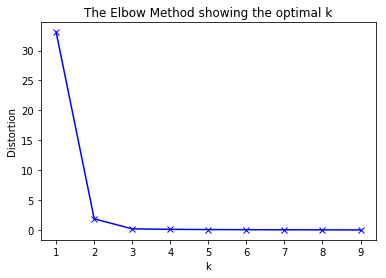

In [6]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
X = data
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### 6.4
Prepare a separate Data frame to show which stocks belong to the same cluster

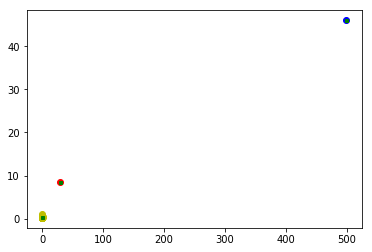

In [7]:
# computing K-Means with K = 3 (3 clusters)
centroids,_ = kmeans(X,3)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=3)

In [8]:
print(returns.idxmax())

Returns       HDFC
Volatility    HDFC
dtype: object


In [10]:
#drop the relevant stock from our data
returns.drop('HDFC',inplace=True)
#recreate data to feed into the algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

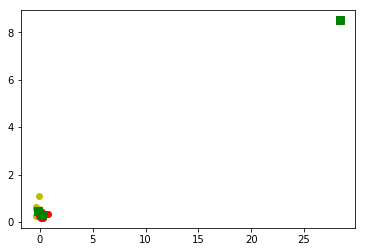

In [11]:
centroids,_ = kmeans(data,3)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

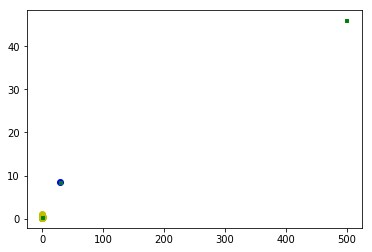

In [12]:
centroids,_ = kmeans(X,3)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=3)

In [13]:
#identify the outlier
print(returns.idxmax())

Returns       DHFL
Volatility    DHFL
dtype: object


In [14]:
#drop the relevant stock from our data
returns.drop('DHFL',inplace=True)
#recreate data to feed into the algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

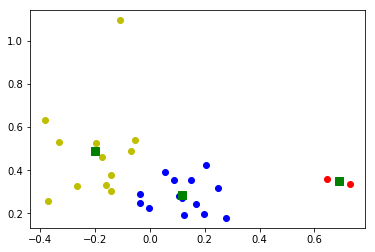

In [15]:
# computing K-Means with K = 3 (3 clusters)
centroids,_ = kmeans(data,3)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [16]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
for detail in details:
    print(detail)

('Adani', 0)
('ASIANPAINT', 0)
('AXISBANK', 0)
('DRREDDY', 1)
('HDFCBANK', 0)
('MARUTI', 0)
('TITAN', 2)
('TCS', 1)
('LT', 1)
('VOLTAS', 0)
('TATAPOWER', 0)
('SUNTV', 0)
('PNB', 1)
('IDBI', 1)
('RBLBANK', 0)
('TATACHEM', 0)
('MINDTREE', 2)
('MRPL', 1)
('PVR', 0)
('FORTIS', 1)
('NCC', 0)
('RCOM', 1)
('ITDC', 1)
('IDFC', 1)
('JKLAKSHMI', 1)
('ASHOKA', 0)
('JETAIRWAYS', 1)
('LEMONTREE', 0)
